In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import dateutil
import math
from sklearn import datasets, linear_model
import pandas as pd

In [2]:
spdata = pd.read_csv("S & P 500 03.01.2007 - 09.04.2019.csv")
bodata = pd.read_csv("BOVESPA 03.01.2007 - 09.04.2019.csv")
returnsp = pd.read_csv("SP 500 Return history.csv")
weightdata=pd.read_csv("sp 500 weighted.csv",encoding='iso-8859-1')
SP500weight=pd.read_excel("SP500 weight.xlsx")
IBOVESPAweight=pd.read_excel("Ibovespa weight.xlsx")

In [3]:
returnsp = returnsp.loc[returnsp["year"]>=2007]
returnsp

,year,return
0,2018,-4.38
1,2017,21.83
2,2016,11.96
3,2015,1.38
4,2014,13.69
5,2013,32.39
6,2012,16.00
7,2011,2.11
8,2010,15.06
9,2009,26.46


In [4]:
spdata.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/3/2007,1418.030029,1429.420044,1407.859985,1416.599976,1416.599976,3429160000
1,1/4/2007,1416.599976,1421.839966,1408.430054,1418.339966,1418.339966,3004460000
2,1/5/2007,1418.339966,1418.339966,1405.750000,1409.709961,1409.709961,2919400000
3,1/8/2007,1409.260010,1414.979980,1403.969971,1412.839966,1412.839966,2763340000
4,1/9/2007,1412.839966,1415.609985,1405.420044,1412.109985,1412.109985,3038380000


In [5]:
spdata["Date"] = spdata["Date"].apply(dateutil.parser.parse, dayfirst=True)

In [6]:
spdata["Year"]=spdata["Date"].dt.year
spdata.head()
# spdata.describe()

,Date,Open,High,Low,Close,Adj Close,Volume,Year
0,2007-03-01,1418.030029,1429.420044,1407.859985,1416.599976,1416.599976,3429160000,2007
1,2007-04-01,1416.599976,1421.839966,1408.430054,1418.339966,1418.339966,3004460000,2007
2,2007-05-01,1418.339966,1418.339966,1405.750000,1409.709961,1409.709961,2919400000,2007
3,2007-08-01,1409.260010,1414.979980,1403.969971,1412.839966,1412.839966,2763340000,2007
4,2007-09-01,1412.839966,1415.609985,1405.420044,1412.109985,1412.109985,3038380000,2007


In [7]:
summarysp =spdata.groupby(["Year"]).mean()
Year = pd.DataFrame(spdata["Year"].unique())

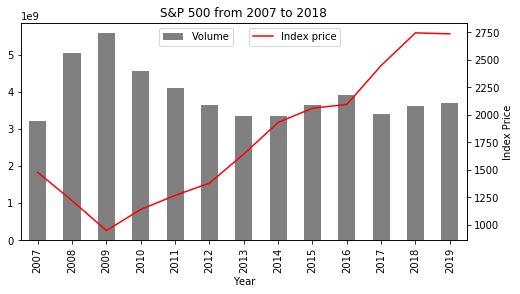

In [8]:
# years = np.linspace(2007,2019,13)

# fig, ax1 = plt.subplots()
# ax1.plot(summarysp["Close"])
# ax2 = ax1.twinx()
# ax2.bar(summarysp["Volume"], color="orange")

plt.figure(figsize=(8,4))
ax1 = summarysp["Volume"].plot(kind="bar",color="grey", label="Volume")
plt.legend(loc="upper left", bbox_to_anchor=(0.3, 1.00))
ax1 = ax1.twinx()
ax1.plot(summarysp["Close"].values, linestyle='-',color="red",label="Index price")
plt.title("S&P 500 from 2007 to 2018")
plt.legend(loc="upper left", bbox_to_anchor=(0.5, 1.00))



plt.ylabel("Index Price")
plt.xlabel("Year")
plt.legend
plt.show()

In [9]:

bodata["Date"] = bodata["Date"].apply(dateutil.parser.parse, dayfirst=True)
bodata["Year"]=bodata["Date"].dt.year
summarybo =bodata.groupby(["Year"]).mean()


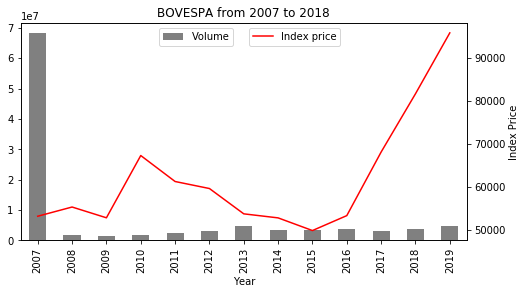

In [10]:
# years = np.linspace(2007,2019,13)
# plt.plot(summarybo["Close"], "b")
# plt.title("BOVESPA from 2007 to 2018")


plt.figure(figsize=(8,4))
ax1 = summarybo["Volume"].plot(kind="bar",color="grey",label="Volume")
plt.legend(loc="upper left", bbox_to_anchor=(0.3, 1.00))
ax2 = ax1.twinx()
ax2.plot(summarybo["Close"].values, linestyle='-',color="red",label="Index price")
plt.legend(loc="upper left", bbox_to_anchor=(0.5, 1.00))
plt.title("BOVESPA from 2007 to 2018")


plt.ylabel("Index Price")
plt.xlabel("Year")
plt.legend
plt.show()


In [11]:
summary2007y = summarysp.loc[2007,"Close"]
summary2018y = summarysp.loc[2018,"Close"]
summary2012y = summarysp.loc[2012,"Close"]



bosummary2007y = summarybo.loc[2007,"Close"]
bosummary2018y = summarybo.loc[2018,"Close"]
bosummary2012y = summarybo.loc[2012,"Close"]


SPdiff_2007_2018 = summary2018y-summary2007y
BOdiff_2007_2018 = bosummary2018y-bosummary2007y

SPdiff_2012_2018 = summary2018y-summary2012y
BOdiff_2012_2018 = bosummary2018y-bosummary2012y

diff=[SPdiff_2007_2018,BOdiff_2007_2018,SPdiff_2012_2018 ,BOdiff_2012_2018]
summarybo

,Open,High,Low,Close,Adj Close,Volume
Year,,,,,,
2007,53035.869388,53634.759184,52456.579592,53114.102041,53114.102041,6.820592e+07
2008,55366.610442,56234.132530,54331.100402,55260.931727,55260.931727,1.834679e+06
2009,52624.691057,53344.280488,52044.272358,52750.857724,52750.857724,1.525830e+06
2010,67255.020243,67805.303644,66657.514170,67258.315789,67258.315789,1.798028e+06
2011,61257.265060,61823.024096,60633.759036,61206.783133,61206.783133,2.335553e+06
2012,59556.559184,60116.122449,59005.706122,59571.604082,59571.604082,3.054135e+06
2013,53715.060484,54171.266129,53204.209677,53670.431452,53670.431452,4.833100e+06
2014,52738.338710,53285.576613,52198.850806,52729.713710,52729.713710,3.560779e+06
2015,49807.085366,50292.560976,49277.008130,49779.882114,49779.882114,3.464343e+06


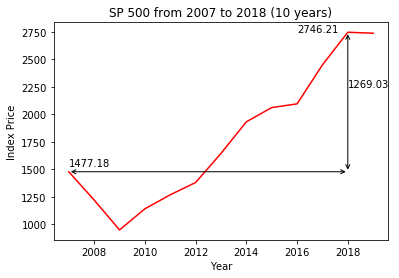

In [12]:
# plt.figure(figsize=(10,10))

# plt.subplot(2,1,1)
plt.figure(0)

plt.plot(summarysp["Close"], "r")
plt.title("SP 500 from 2007 to 2018 (10 years)")

arrowprops = dict(arrowstyle='<->')

plt.annotate("",xy=(2018,summary2007y), xytext=(2007,summary2007y), arrowprops=arrowprops)
plt.annotate('%.2f'%summary2007y,xy=(2007,summary2007y+50))

plt.annotate("",xy=(2018,summary2007y), xytext=(2018,summary2018y), arrowprops=arrowprops)
plt.annotate('%.2f'%summary2018y,xy=(2016,summary2018y))

plt.annotate('%.2f'%SPdiff_2007_2018,xy=(2018,summary2018y-500))


plt.ylabel("Index Price")
plt.xlabel("Year")

plt.show()



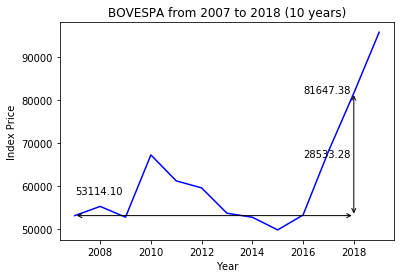

In [13]:
# plt.figure(figsize=(8,10))
# plt.subplot(2,1,1)
# plt.plot(summarysp["Close"], "r")
# plt.title("SP 500 from 2007 to 2018 (10 years)")
# arrowprops = dict(arrowstyle='<->')
# plt.annotate('%.2f'%summary2007y,xy=(2018,summary2007y), xytext=(2007,summary2007y), arrowprops=arrowprops)
# plt.annotate('%.2f'%summary2018y,xy=(2018.5,summary2007y), xytext=(2018,summary2018y), arrowprops=arrowprops)
# plt.annotate('%.2f'%SPdiff_2007_2018,xy=(2017,2250))

# plt.subplot(2,1,2)
plt.figure(1)


plt.plot(summarybo["Close"], "b")
plt.title("BOVESPA from 2007 to 2018 (10 years)")
arrowprops = dict(arrowstyle='<->')

plt.annotate("",xy=(2018,bosummary2007y), xytext=(2007,bosummary2007y), arrowprops=arrowprops)
plt.annotate('%.2f'%bosummary2007y,xy=(2007,bosummary2007y+5000))

plt.annotate("",xy=(2018,bosummary2007y), xytext=(2018,bosummary2018y), arrowprops=arrowprops)
plt.annotate('%.2f'%bosummary2018y,xy=(2016,bosummary2018y))

plt.annotate('%.2f'%BOdiff_2007_2018,xy=(2016,bosummary2018y-15000))

plt.ylabel("Index Price")
plt.xlabel("Year")

plt.show()


# plt.ylim(800,3000) 



In [14]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
n=len(returnsp)
year = returnsp["year"].values.reshape(-1,1)
reg.fit(year,returnsp["return"].values)
predict =reg.predict(year)




# bestfit=np.polyfit(returnsp["year"],returnsp["return"],1, full=False)
# bestfit
# slope = bestfit[0]
# intercept = bestfit[1]
# xl = [min(returnsp["year"]),max(returnsp["year"])]
# yl = [slope*xx + intercept for xx in xl]
# plt.plot(xl,yl,"--r")

In [15]:
equationsp = "Y={}x + {}".format(float(reg.coef_),reg.intercept_)
equationsp

'Y=1.0563986013986015x + -2117.253018648019'

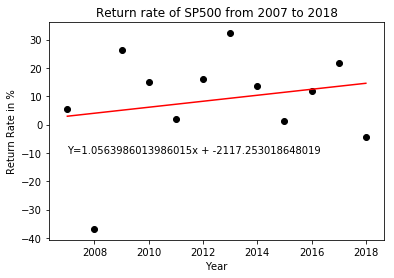

In [16]:

plt.plot(year, predict, color="red")
reg.score(year,predict)
plt.scatter(returnsp["year"],returnsp["return"],color="black", label="Return")
plt.title("Return rate of SP500 from 2007 to 2018")
plt.annotate(equationsp,xy=(2007,-10))

plt.ylabel("Return Rate in %")
plt.xlabel("Year")
# plt.ylim(-50,50)
plt.show()

In [17]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
n=len(returnsp)
year =np.arange(2007,2012,1)
return5year=returnsp.iloc[0:5,[1]]
year = year.reshape(-1,1)
reg.fit(year,return5year)
predict =reg.predict(year)



equationsp = "Y={}x + {}".format(int(reg.coef_),int(reg.intercept_))
equationsp

'Y=1x + -3143'

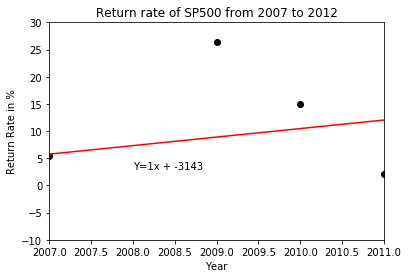

In [18]:

plt.plot(year, predict, color="red")


plt.scatter(returnsp["year"],returnsp["return"],color="black", label="Return")
plt.title("Return rate of SP500 from 2007 to 2012")
plt.annotate(equationsp,xy=(2008,3))
plt.xlim(2007,2011)
plt.ylim(-10,30)
plt.ylabel("Return Rate in %")
plt.xlabel("Year")
plt.show()

In [19]:
summarybo
years = pd.DataFrame(np.linspace(2007,2019,13))
returnbo = (summarybo["Close"]-summarybo["Open"])/summarybo["Open"]
returnbo = pd.DataFrame(returnbo)
returnbo.columns=["return"]
# years=returnsp["year"]
# years =years.sort_values()
# years
years =np.arange(2007, 2020)
years

array([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018, 2019])

In [20]:
returnbo


,return
Year,
2007,0.001475
2008,-0.001909
2009,0.002397
2010,0.000049
2011,-0.000824
2012,0.000253
2013,-0.000831
2014,-0.000164
2015,-0.000546


In [21]:
returntable =returnsp.mean().append(returnbo.mean()).drop("year")
returntable

return    8.749167
return    0.000310
dtype: float64

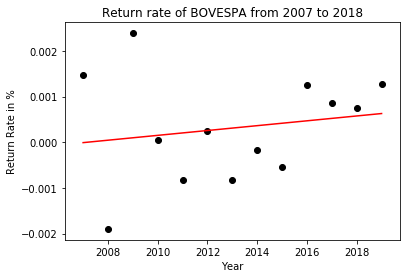

In [22]:
n=len(returnsp)
regbo = LinearRegression()
year = years.reshape(-1,1)
regbo.fit(year,returnbo["return"].values)
predictbo =regbo.predict(year)
plt.plot(year, predictbo, color="red")
reg.score(year,predictbo)



plt.scatter(year,returnbo["return"],color="black", label="Return")
plt.title("Return rate of BOVESPA from 2007 to 2018")
# plt.ylim(-10,10)

plt.ylabel("Return Rate in %")
plt.xlabel("Year")
plt.show()

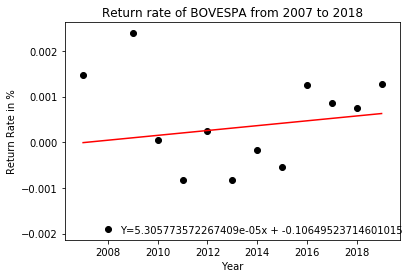

In [23]:
plt.plot(year, predictbo, color="red")
reg.score(year,predictbo)

equationbo = "Y={}x + {}".format(float(regbo.coef_),regbo.intercept_)
equationbo

plt.scatter(year,returnbo["return"],color="black", label="Return")
plt.title("Return rate of BOVESPA from 2007 to 2018")
plt.annotate(equationbo,xy=(2008.5,-0.002))
# plt.ylim(-10,10)

plt.ylabel("Return Rate in %")
plt.xlabel("Year")
plt.show()

In [24]:
returnbo

,return
Year,
2007,0.001475
2008,-0.001909
2009,0.002397
2010,0.000049
2011,-0.000824
2012,0.000253
2013,-0.000831
2014,-0.000164
2015,-0.000546


In [25]:
n=len(returnsp)
regbo = LinearRegression()


year =np.arange(2007,2013)
return5year=returnbo.iloc[0:6,[0]]
year = year.reshape(-1,1)
regbo.fit(year,return5year)
predictbo =regbo.predict(year)



equationbo = "Y={}x + {}".format(float(regbo.coef_),float(regbo.intercept_))
equationbo






'Y=-0.00014877189521643453x + 0.29919735353058335'

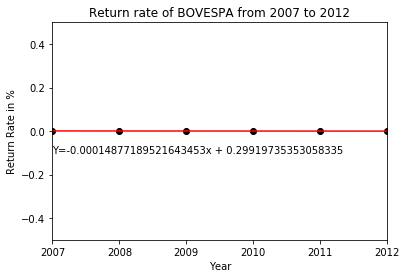

In [26]:




plt.plot(year, predictbo, color="red")
reg.score(year,predictbo)
plt.scatter(year,return5year,color="black", label="Return")
plt.title("Return rate of BOVESPA from 2007 to 2012")
plt.annotate(equationbo,xy=(2007,-0.1))
plt.xlim(2007,2012)
plt.ylim(-0.5,0.5)

plt.ylabel("Return Rate in %")
plt.xlabel("Year")

plt.show()

In [27]:
regbo.coef_
equation="Y={}x + {}".format(float(regbo.coef_),regbo.intercept_)
equation

'Y=-0.00014877189521643453x + [0.29919735]'

In [28]:
SP500weight=SP500weight.sort_values(by="Weight", ascending = False)
SP500weight.head(10)

,#,Company,Symbol,Weight,Price,Change
0,1,Microsoft Corporation,MSFT,3.833699,120.94,0.61(0.51%)
1,2,Apple Inc.,AAPL,3.700833,199.03,0.08(0.04%)
2,3,Amazon.com Inc.,AMZN,3.159661,"1,843.00",-1.07(-0.06%)
3,4,Facebook Inc. Class A,FB,1.758456,179.05,1.54(0.87%)
4,5,Berkshire Hathaway Inc. Class B,BRK.B,1.668842,210.49,3.82(1.85%)
5,6,Alphabet Inc. Class C,GOOG,1.537651,"1,218.75",14.13(1.17%)
6,7,Alphabet Inc. Class A,GOOGL,1.503662,"1,222.78",13.19(1.09%)
7,8,Johnson & Johnson,JNJ,1.495294,136.15,0.94(0.70%)
8,9,JPMorgan Chase & Co.,JPM,1.444381,111.40,5.17(4.87%)
9,10,Exxon Mobil Corporation,XOM,1.441889,81.00,-0.95(-1.16%)


In [29]:
IBOVESPAweight=IBOVESPAweight.sort_values(by="Part. (%)", ascending = False)
IBOVESPAweight=IBOVESPAweight.drop([IBOVESPAweight.index[0]])
IBOVESPAweight.head(10)


,Code,Stock,Type,Theoretical Quantity,Part. (%)
61,VALE3,VALE,ON NM,3.067180e+09,10.455
34,ITUB4,ITAUUNIBANCO,PN N1,4.339644e+09,9.511
4,BBDC4,BRADESCO,PN N1,3.776708e+09,8.755
48,PETR4,PETROBRAS,PN N2,4.332323e+09,7.984
47,PETR3,PETROBRAS,ON N2,2.708735e+09,5.679
0,ABEV3,AMBEV S/A,ON,4.347502e+09,4.936
2,BBAS3,BRASIL,ON NM,1.331530e+09,4.229
1,B3SA3,B3,ON NM,2.044216e+09,4.227
33,ITSA4,ITAUSA,PN N1,4.492855e+09,3.451
40,LREN3,LOJAS RENNER,ON NM,7.073115e+08,1.951


In [30]:
msdata = pd.read_csv("MSFT.csv")
amazon = pd.read_csv("AMZN.csv")
apple = pd.read_csv("AAPL.csv")

In [31]:

msdata["Date"] = msdata["Date"].apply(dateutil.parser.parse, dayfirst=True)
msdata["Year"]=msdata["Date"].dt.year
summaryms =msdata.groupby(["Year"]).mean()
summaryms.head()

,Open,High,Low,Close,Adj Close,Volume
Year,,,,,,
2007,30.431912,30.727689,30.156932,30.446773,23.083923,6.239719e+07
2008,26.699842,27.132411,26.235336,26.647391,20.483023,8.417402e+07
2009,22.935556,23.246984,22.673730,22.976786,18.104559,6.243119e+07
2010,27.074802,27.322143,26.793254,27.058571,21.725925,6.306716e+07
2011,26.044722,26.296825,25.790476,26.052341,21.419456,6.068366e+07


In [32]:

amazon["Date"] = amazon["Date"].apply(dateutil.parser.parse, dayfirst=True)
amazon["Year"]=amazon["Date"].dt.year
summaryamz =amazon.groupby(["Year"]).mean()
summaryamz

,Open,High,Low,Close,Adj Close,Volume
Year,,,,,,
2019,1787.634776,1801.290002,1775.964785,1790.336951,1790.336951,4.348957e+06


In [33]:

apple["Date"] = apple["Date"].apply(dateutil.parser.parse, dayfirst=True)
apple["Year"]=apple["Date"].dt.year
summaryapple =apple.groupby(["Year"]).mean()
summaryapple.head()

,Open,High,Low,Close,Adj Close,Volume
Year,,,,,,
2007,18.341298,18.581497,18.026357,18.324843,12.219061,2.460119e+08
2008,20.330536,20.730096,19.836815,20.282716,13.524576,2.825901e+08
2009,20.945584,21.213668,20.709269,20.973447,13.985158,1.421168e+08
2010,37.136803,37.481258,36.692517,37.120351,24.751962,1.498263e+08
2011,52.008775,52.489081,51.471100,52.000618,34.674169,1.230747e+08


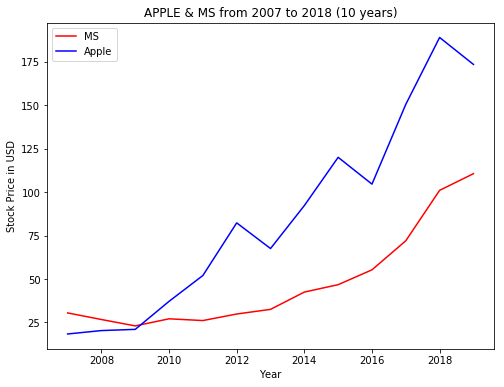

In [34]:
plt.figure(figsize=(8,6))

# plt.subplot(2,1,2)

plt.plot(summaryms["Close"], "r", label="MS")
plt.title("APPLE & MS from 2007 to 2018 (10 years)")
plt.plot(summaryapple["Close"], "b", label="Apple")





plt.legend(loc="upper left")

plt.ylabel("Stock Price in USD")
plt.xlabel("Year")


plt.show()

C:\Users\carve\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


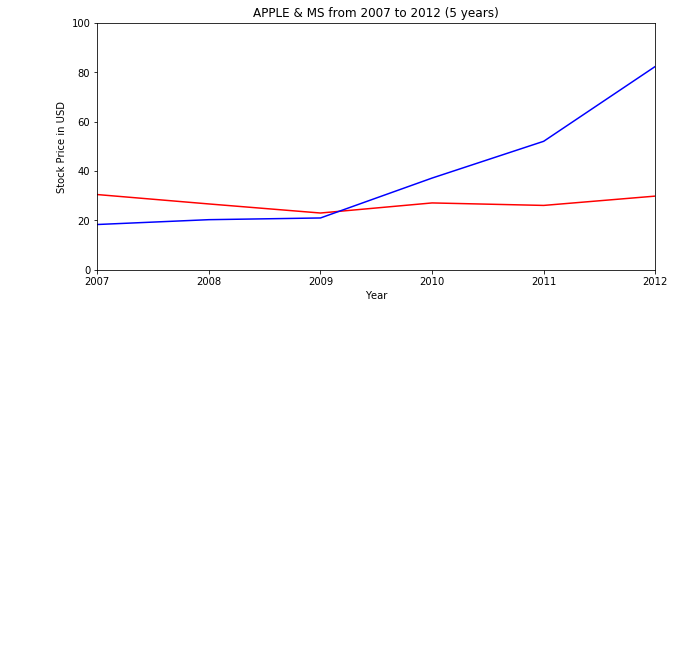

In [35]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(summaryms["Close"], "r")
plt.title("APPLE & MS from 2007 to 2018 (5 years)")
label = "{:.2f}".format(summary2007y)
plt.xlim(2007,2012)
plt.ylim(0,100)
plt.annotate(label,xy=(2,1700),xytext=(3,1.5),arrowprops = dict(facecolor='black', shrink=0.05) )

plt.subplot(2,1,1)
plt.plot(summaryapple["Close"], "b")
plt.xlim(2007,2012)
plt.ylim(0,100)
plt.title("APPLE & MS from 2007 to 2012 (5 years)")
plt.ylabel("Stock Price in USD")
plt.xlabel("Year")

plt.show()

In [36]:
valdata = pd.read_csv("VALE3.SA.csv")
ITUBdata = pd.read_csv("ITUB4.SA.csv")


In [37]:

valdata["Date"] = valdata["Date"].apply(dateutil.parser.parse, dayfirst=True)
valdata["Year"]=valdata["Date"].dt.year
summaryval =valdata.groupby(["Year"]).mean()
summaryval.head()

,Open,High,Low,Close,Adj Close,Volume
Year,,,,,,
2007,46.756123,47.459735,45.995204,46.765510,31.080160,2.563281e+06
2008,47.501044,48.469197,46.272651,47.314177,31.617199,3.639995e+06
2009,38.153482,38.791053,37.553522,38.207287,26.077943,3.883185e+06
2010,51.532389,52.135951,50.896842,51.498219,35.823902,2.913399e+06
2011,48.812845,49.292971,48.220544,48.766318,34.862755,3.671202e+06


In [38]:
ITUBdata["Date"] = ITUBdata["Date"].apply(dateutil.parser.parse, dayfirst=True)
ITUBdata["Year"]=ITUBdata["Date"].dt.year
summaryITUB =ITUBdata.groupby(["Year"]).mean()
summaryITUB.head()

,Open,High,Low,Close,Adj Close,Volume
Year,,,,,,
2007,13.951658,14.141155,13.728098,13.935934,10.265258,1.237385e+07
2008,13.044120,13.335881,12.725314,13.020841,9.591197,1.132770e+07
2009,13.415646,13.631710,13.194880,13.433280,9.895001,1.336071e+07
2010,17.282127,17.470613,17.069635,17.294478,12.832014,1.169411e+07
2011,15.382990,15.561188,15.175476,15.378214,11.582277,1.774619e+07


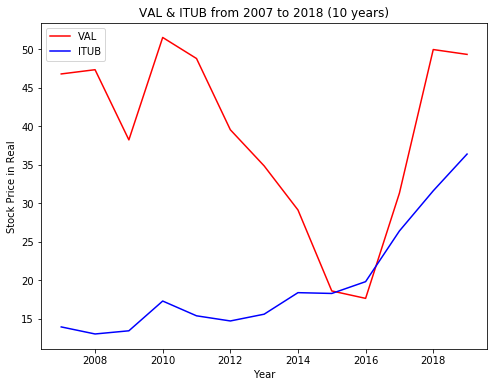

In [39]:
plt.figure(figsize=(8,6))

# plt.subplot(2,1,2)

plt.plot(summaryval["Close"], "r", label="VAL")
plt.title("VAL & ITUB from 2007 to 2018 (10 years)")
plt.plot(summaryITUB["Close"], "b", label="ITUB")





plt.legend(loc="upper left")

plt.ylabel("Stock Price in Real")
plt.xlabel("Year")


plt.show()